In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns

In [14]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                    y_train_full, test_size=0.175)

In [15]:
X_train = (255-X_train)/255.
X_valid =(255-X_valid)/255.
X_test =(255-X_test)/255.

40000
0


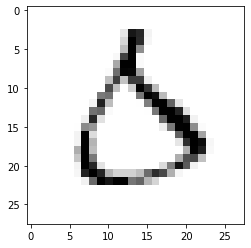

In [302]:
def extract_data_by_label(X, y, label, num_samples):
    label_indices = np.where(y == label)[0]
    selected_indices = np.random.choice(label_indices, num_samples, replace=False)
    selected_X = X[selected_indices]
    selected_y = y[selected_indices]
    return selected_X, selected_y

selected_X = []
selected_y = []
for label in np.unique(y_train):
    X, y = extract_data_by_label(X_train, y_train, label, 4000)
    selected_X.append(X)
    selected_y.append(y)

selected_X = np.concatenate(selected_X, axis=0)
selected_y = np.concatenate(selected_y, axis=0)
print(len(selected_X))
print(selected_y[0])
plt.imshow(selected_X[0], cmap="gray")

In [303]:
print(X_train.shape[0], X_valid.shape[0], X_test.shape[0])

49500 10500 10000


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


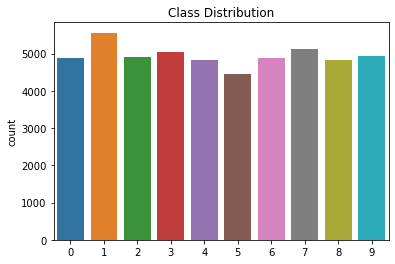

In [304]:
sns.countplot(y_train)
plt.title("Class Distribution")
plt.show()

(-0.5, 27.5, 27.5, -0.5)

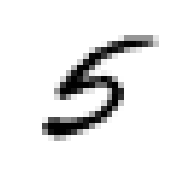

In [305]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0], cmap="gray")
plt.axis("off")

In [306]:
#　訓練データをpreprocessして画像データ水増し
# example
from keras.preprocessing.image import ImageDataGenerator
n_shift = 1000
n_rotate = 1000
n_zoom = 1000
n_channel_shift= 1000

rotate_array = np.random.randint(1, 90, size=n_rotate)
width_shift_array = np.random.randint(1,3, size=n_shift)
height_shift_array = np.random.randint(1,3, size=n_shift)

image_data_generator = ImageDataGenerator(
  rotation_range=20,       # ランダムに±20度範囲で回転 
  width_shift_range=2,     # ランダムに±8px範囲で左右方向移動
  height_shift_range=2,    # ランダムに±4px範囲で上下方向移動
  zoom_range=(0.8, 1.05),   # ランダムに0.8～1.2倍の範囲でズーム
  channel_shift_range=-0.2) # チャンネル値（明度）のランダムシフト範囲

In [307]:
X0 = X_train[0].copy()

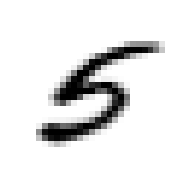

In [308]:
ex_img = image_data_generator.flow(X0.reshape(1,28,28,1), batch_size=1)[0][0]
plt.figure(figsize=(3,3))
plt.axis("off")
plt.imshow(ex_img.reshape(28,28), cmap="gray")

In [309]:
generators = []
for i in range(1000):
    image_data_generator = ImageDataGenerator(
        rotation_range=rotate_array[i],
        width_shift_range=width_shift_array[i],
        height_shift_range=height_shift_array[i],
        zoom_range=(0.8, 1.1))
    generators.append(image_data_generator)


for i in range(1,1001):
    print(i)
    X_generating = selected_X[(i-1)*40:i*40]
    X_generating_with_channel = np.expand_dims(X_generating, axis=-1)
    X_generated = generators[i-1].flow(X_generating_with_channel,
                                          batch_size=40)[0]
    X_target = np.reshape(X_generated, (40, 28, 28))
    print(X_generated.shape)
    X_train = np.concatenate((X_train, X_target),axis=0)
    y_train = np.concatenate((y_train, selected_y[(i-1)*40:i*40]))

1
(40, 28, 28, 1)
2
(40, 28, 28, 1)
3
(40, 28, 28, 1)
4
(40, 28, 28, 1)
5
(40, 28, 28, 1)
6
(40, 28, 28, 1)
7
(40, 28, 28, 1)
8
(40, 28, 28, 1)
9
(40, 28, 28, 1)
10
(40, 28, 28, 1)
11
(40, 28, 28, 1)
12
(40, 28, 28, 1)
13
(40, 28, 28, 1)
14
(40, 28, 28, 1)
15
(40, 28, 28, 1)
16
(40, 28, 28, 1)
17
(40, 28, 28, 1)
18
(40, 28, 28, 1)
19
(40, 28, 28, 1)
20
(40, 28, 28, 1)
21
(40, 28, 28, 1)
22
(40, 28, 28, 1)
23
(40, 28, 28, 1)
24
(40, 28, 28, 1)
25
(40, 28, 28, 1)
26
(40, 28, 28, 1)
27
(40, 28, 28, 1)
28
(40, 28, 28, 1)
29
(40, 28, 28, 1)
30
(40, 28, 28, 1)
31
(40, 28, 28, 1)
32
(40, 28, 28, 1)
33
(40, 28, 28, 1)
34
(40, 28, 28, 1)
35
(40, 28, 28, 1)
36
(40, 28, 28, 1)
37
(40, 28, 28, 1)
38
(40, 28, 28, 1)
39
(40, 28, 28, 1)
40
(40, 28, 28, 1)
41
(40, 28, 28, 1)
42
(40, 28, 28, 1)
43
(40, 28, 28, 1)
44
(40, 28, 28, 1)
45
(40, 28, 28, 1)
46
(40, 28, 28, 1)
47
(40, 28, 28, 1)
48
(40, 28, 28, 1)
49
(40, 28, 28, 1)
50
(40, 28, 28, 1)
51
(40, 28, 28, 1)
52
(40, 28, 28, 1)
53
(40, 28, 28, 1)
54

417
(40, 28, 28, 1)
418
(40, 28, 28, 1)
419
(40, 28, 28, 1)
420
(40, 28, 28, 1)
421
(40, 28, 28, 1)
422
(40, 28, 28, 1)
423
(40, 28, 28, 1)
424
(40, 28, 28, 1)
425
(40, 28, 28, 1)
426
(40, 28, 28, 1)
427
(40, 28, 28, 1)
428
(40, 28, 28, 1)
429
(40, 28, 28, 1)
430
(40, 28, 28, 1)
431
(40, 28, 28, 1)
432
(40, 28, 28, 1)
433
(40, 28, 28, 1)
434
(40, 28, 28, 1)
435
(40, 28, 28, 1)
436
(40, 28, 28, 1)
437
(40, 28, 28, 1)
438
(40, 28, 28, 1)
439
(40, 28, 28, 1)
440
(40, 28, 28, 1)
441
(40, 28, 28, 1)
442
(40, 28, 28, 1)
443
(40, 28, 28, 1)
444
(40, 28, 28, 1)
445
(40, 28, 28, 1)
446
(40, 28, 28, 1)
447
(40, 28, 28, 1)
448
(40, 28, 28, 1)
449
(40, 28, 28, 1)
450
(40, 28, 28, 1)
451
(40, 28, 28, 1)
452
(40, 28, 28, 1)
453
(40, 28, 28, 1)
454
(40, 28, 28, 1)
455
(40, 28, 28, 1)
456
(40, 28, 28, 1)
457
(40, 28, 28, 1)
458
(40, 28, 28, 1)
459
(40, 28, 28, 1)
460
(40, 28, 28, 1)
461
(40, 28, 28, 1)
462
(40, 28, 28, 1)
463
(40, 28, 28, 1)
464
(40, 28, 28, 1)
465
(40, 28, 28, 1)
466
(40, 28, 28, 1)


827
(40, 28, 28, 1)
828
(40, 28, 28, 1)
829
(40, 28, 28, 1)
830
(40, 28, 28, 1)
831
(40, 28, 28, 1)
832
(40, 28, 28, 1)
833
(40, 28, 28, 1)
834
(40, 28, 28, 1)
835
(40, 28, 28, 1)
836
(40, 28, 28, 1)
837
(40, 28, 28, 1)
838
(40, 28, 28, 1)
839
(40, 28, 28, 1)
840
(40, 28, 28, 1)
841
(40, 28, 28, 1)
842
(40, 28, 28, 1)
843
(40, 28, 28, 1)
844
(40, 28, 28, 1)
845
(40, 28, 28, 1)
846
(40, 28, 28, 1)
847
(40, 28, 28, 1)
848
(40, 28, 28, 1)
849
(40, 28, 28, 1)
850
(40, 28, 28, 1)
851
(40, 28, 28, 1)
852
(40, 28, 28, 1)
853
(40, 28, 28, 1)
854
(40, 28, 28, 1)
855
(40, 28, 28, 1)
856
(40, 28, 28, 1)
857
(40, 28, 28, 1)
858
(40, 28, 28, 1)
859
(40, 28, 28, 1)
860
(40, 28, 28, 1)
861
(40, 28, 28, 1)
862
(40, 28, 28, 1)
863
(40, 28, 28, 1)
864
(40, 28, 28, 1)
865
(40, 28, 28, 1)
866
(40, 28, 28, 1)
867
(40, 28, 28, 1)
868
(40, 28, 28, 1)
869
(40, 28, 28, 1)
870
(40, 28, 28, 1)
871
(40, 28, 28, 1)
872
(40, 28, 28, 1)
873
(40, 28, 28, 1)
874
(40, 28, 28, 1)
875
(40, 28, 28, 1)
876
(40, 28, 28, 1)


2


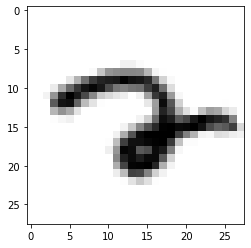

In [313]:
print(y_train[60007])
plt.imshow(X_train[60007],cmap="gray")

In [314]:
np.save("shifted_mnist_train.npy", X_train)
np.save("shifted_mnist_train_label", y_train)

In [320]:
keras.backend.clear_session()
# build a normal CNN
model = keras.models.Sequential([
    keras.layers.Conv2D(32,7,activation="relu",padding="SAME",input_shape=[28, 28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64,3,activation="relu",padding="SAME"),
    keras.layers.Conv2D(64,3,activation="relu",padding="SAME"),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
    ])
save_best_cb = keras.callbacks.ModelCheckpoint("best_C14practicemnist.h5",
                                               monitor="val_accuracy",
                                               save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=5)
model.compile(optimizer="nadam", metrics=["accuracy"], loss="sparse_categorical_crossentropy")
histroy = model.fit(X_train, y_train, epochs=200,batch_size=100, validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cb, save_best_cb])

Epoch 1/200
895/895 [==============================] - 110s 121ms/step - loss: 0.3126 - accuracy: 0.9021 - val_loss: 0.0505 - val_accuracy: 0.9860
Epoch 2/200
895/895 [==============================] - 107s 120ms/step - loss: 0.1186 - accuracy: 0.9642 - val_loss: 0.0424 - val_accuracy: 0.9885
Epoch 3/200
895/895 [==============================] - 107s 120ms/step - loss: 0.0873 - accuracy: 0.9739 - val_loss: 0.0527 - val_accuracy: 0.9834
Epoch 4/200
895/895 [==============================] - 108s 121ms/step - loss: 0.0685 - accuracy: 0.9790 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 5/200
895/895 [==============================] - 108s 121ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0438 - val_accuracy: 0.9890
Epoch 6/200
895/895 [==============================] - 109s 122ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0328 - val_accuracy: 0.9908
Epoch 7/200
895/895 [==============================] - 111s 124ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0

In [321]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0316 - accuracy: 0.9938


[0.03162609413266182, 0.9937999844551086]

In [16]:
model = keras.models.load_model("best_C14practicemnist.h5")
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0316 - accuracy: 0.9938


[0.03162609413266182, 0.9937999844551086]

In [40]:
import pandas as pd
xo = pd.read_csv("test.csv")
xu = np.array(xo)
xii = xu.reshape(28000, 28, 28)
xii =(255-xii)/255
predictions = model.predict(xii)
prediction = np.argmax(predictions, axis=1) 
prediction

875/875 [==============================] - 12s 14ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [54]:
import pandas as pd

df = pd.DataFrame({'ImageId': range(1, len(prediction) + 1), 'Label': prediction})
df.to_csv('prediction.csv', index=False)
print(df)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]
